## Student Details ( 1 Point)

Student Name and ID: DEEPESH BHATTA - 1001837305

Student Name and ID: HARSH VINOD CHALUDIA - 1001744551



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

In [ ]:
# import sklearn
from math import sqrt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import math
import operator
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
%matplotlib inline
matplotlib.style.use('ggplot')

# RESOURCES

### KNN - https://www.edureka.co/blog/k-nearest-neighbors-algorithm/

# TASK 1 : Load iris dataset from sklearn datasets

In [44]:
# Load iris dataset from sklearn datasets
iris = load_iris()

# Assigning colum names to the dataset
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# TASK 3 : Select only 2 attributes for training and testing your model.


In [45]:
# Taking Sepal Width, and Petal length for 2 attributes selection for training, and testing our model.
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 4].values

In [46]:
# Standard Scaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

# Robust Scaler
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

# TASK 2 : Split your dataset 70% for training, 30% for testing the classifier.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [48]:
def printFigure(classifier):
    # step size in the mesh
    h = .02
    # Creating ColorMaps
    cmap_light = ListedColormap(['#A52A2A', '#90EE90', '#CC99CC'])
    cmap_bold = ListedColormap(['#D2B48C', '#008000', '#800080'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Putting the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #Showing the figure
    plt.show()

# TASK 4 : Use Euclidean distance

In [49]:
# Calculating Euclidean Distance
def euclideanDistance(firstInstance, secondInstance, length):
    dist = 0
    for x in range(length):
        dist += pow((firstInstance[x] - secondInstance[x]), 2)
    return math.sqrt(dist)

def neighboursGet(trainingData, testData, k):
    distances = []
    length = len(testData)-1
    for x in range(len(trainingData)):
        dist = euclideanDistance(testData, trainingData[x], length)
        distances.append((trainingData[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

# Original Data 
OriginalData = dataset.iloc[:, 0:5].values
# Test Instance Data
testData = [[7.1, 3.0, 5.9, 2.1] ,[4.6,3.1,1.5,0.2],[5.0,3.6,1.4,0.2],[6.7,3.0,5.2,2.3]]
for instance in testData:
    neighbors = neighboursGet(OriginalData, instance, 1)
    print(neighbors)


[array([7.1, 3. , 5.9, 2.1, 2. ])]
[array([4.6, 3.1, 1.5, 0.2, 0. ])]
[array([5. , 3.6, 1.4, 0.2, 0. ])]
[array([6.7, 3. , 5.2, 2.3, 2. ])]


# 1. First Classifier with k = 5 ( TASK 5,6,7 )

In [50]:
# Creating the KNN classifier
classifierFirst = KNeighborsClassifier(n_neighbors=5)

# Training the model using the training data
classifierFirst.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = classifierFirst.predict(X_test)
print(y_pred)

Response for test dataset:
[1. 0. 0. 0. 0. 2. 0. 1. 0. 2. 0. 2. 2. 1. 2. 0. 1. 2. 1. 2. 2. 1. 2. 1.
 0. 1. 2. 1. 2. 2. 0. 0. 2. 0. 2. 2. 2. 1. 0. 0. 0. 1. 2. 0. 1.]


In [52]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 10  0]
 [ 0  2 17]]


In [53]:
# Classification Report (includes:precision, recall, f1-score, and support)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.83      1.00      0.91        10
         2.0       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [54]:
accuracy1 = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal to ' + str(round(accuracy1, 2)) + ' %.')

Accuracy of our model is equal to 95.56 %.


# TASK 8 : First 2-D graph

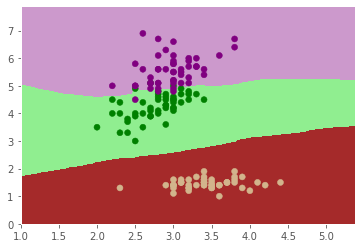

In [55]:
printFigure(classifierFirst)

# 2. Second Classifier with k = 7 ( TASK 5,6,7 )

In [56]:
# Creating the KNN classifier
classifierSecond = KNeighborsClassifier(n_neighbors=7)

# Training the model using the training data
classifierSecond.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = classifierSecond.predict(X_test)
print(y_pred)

Response for test dataset:
[1. 0. 0. 0. 0. 2. 0. 1. 0. 2. 0. 2. 2. 1. 2. 0. 1. 2. 1. 2. 2. 1. 2. 1.
 0. 1. 2. 1. 2. 2. 0. 0. 2. 0. 2. 2. 2. 1. 0. 0. 0. 1. 2. 0. 1.]


In [58]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 10  0]
 [ 0  2 17]]


In [59]:
# Classification Report (includes:precision, recall, f1-score, and support)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.83      1.00      0.91        10
         2.0       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [60]:
accuracy2 = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy2, 2)) + ' %.')

Accuracy of our model is equal to 95.56 %.


# TASK 8 : Second 2-D graph

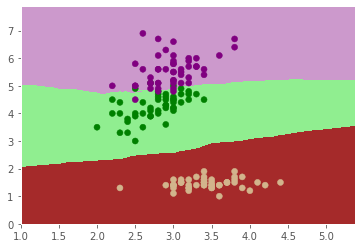

In [61]:
printFigure(classifierSecond)

# 3. Third Classifier with k = 9 ( TASK 5,6,7 )

In [62]:
# Creating the KNN classifier
classifierThird = KNeighborsClassifier(n_neighbors=9)

# Training the model using the training data
classifierThird.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [63]:
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = classifierThird.predict(X_test)
print(y_pred)

Response for test dataset:
[1. 0. 0. 0. 0. 2. 0. 1. 0. 2. 0. 2. 2. 1. 2. 0. 1. 2. 1. 2. 2. 1. 2. 1.
 0. 1. 2. 1. 2. 2. 0. 0. 2. 0. 2. 2. 2. 1. 0. 0. 0. 1. 2. 0. 1.]


In [64]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 10  0]
 [ 0  2 17]]


In [65]:
# Classification Report (includes:precision, recall, f1-score, and support)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.83      1.00      0.91        10
         2.0       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [66]:
accuracy3 = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy3, 2)) + ' %.')

Accuracy of our model is equal to 95.56 %.


# TASK 8 : Third 2-D graph

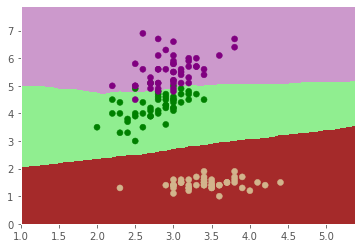

In [67]:
printFigure(classifierThird)